# End-to-End Analysis of Kaggle Airbnb Data

## Set Up
First, let's import our dependencies into the notebook.  We are using numpy and pandas to represent data in a tabular format, we are using sklearn and statsmodels for modeling, and matplotlib and plotly for visiualizations.

In [68]:
# Data Representation
import numpy as np
import pandas as pd

# Modeling
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.tree import export_graphviz
import statsmodels

# Visualization
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly
import plotly.express as px

# Magic Commands
%matplotlib inline

random_state = 42

## Collect the Data

In [3]:
link = 'https://drive.google.com/file/d/1tT0lNiDHwGQPLa3N0zSdhZcJZaa5aqF3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]

In [4]:
listings_df = pd.read_csv(path)
listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


## Get to Know the Data with Exploratory Data Analysis (EDA)

In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [13]:
listings_df["property_type"].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [17]:
listings_df.select_dtypes(exclude='object')

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30
3814,8902327,20160104002432,46566046,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1,2.00
3815,10267360,20160104002432,52791370,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3816,9604740,20160104002432,25522052,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [18]:
listings_df.select_dtypes(exclude='object').columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [20]:
non_object_columns = listings_df.select_dtypes(exclude='object').columns
non_object_columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [44]:
listings_df['bathrooms'].astype('object')

0       1.0
1       1.0
2       4.5
3       1.0
4       2.0
       ... 
3813    2.0
3814    1.0
3815    1.0
3816    1.0
3817    1.5
Name: bathrooms, Length: 3818, dtype: object

In [28]:
non_object_columns = [column for column in non_object_columns if not 'id' in column or not 'availability' in column]
non_object_columns

['host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month']

In [29]:
listings_df[non_object_columns].describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [14]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [35]:
px.histogram(listings_df, x="bedrooms", title="Histogram of Bedrooms", labels={'bedrooms':"Number of Bedrooms"})

In [50]:
beds_baths = listings_df[['bedrooms', 'bathrooms']]
beds_baths['bathrooms'] = beds_baths['bathrooms'].astype('object')

In [64]:
px.histogram(beds_baths.dropna(), x="bedrooms", color="bathrooms", nbins=5)

In [66]:
px.histogram(beds_baths.dropna(), x="bathrooms", color="bedrooms", nbins=5, title="Histogram of Bedrooms with Bathrooms",)

In [40]:
px.histogram(listings_df, x="price", title="Histogram of Listing Prices", labels={'price':"Price Per Night in $"}, nbins=20)

In [67]:
### Split 

In [72]:
listings_df.shape

(3818, 92)

In [69]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(listings_df, test_size=0.2, random_state=random_state)

In [70]:
train_set.shape

(3054, 92)

In [71]:
test_set.shape

(764, 92)

In [77]:
## Discover and Visualize the Data

In [80]:
listings = train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

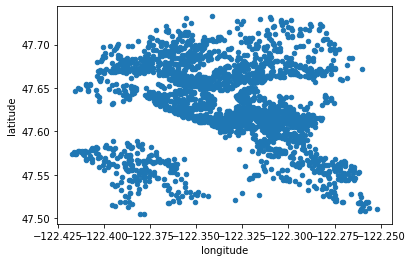

In [81]:
listings.plot(kind="scatter", x="longitude", y="latitude")

In [82]:
px.scatter(listings, x="longitude", y="latitude")

In [98]:
px.scatter_geo(listings, 
                lat="latitude", 
                lon="longitude", 
                #scope='usa', 
                projection="natural earth",
                center={'lat':listings['latitude'].mean(), 'lon':listings['longitude'].mean()}
                )

In [93]:
listings['latitude'].mean()

47.628755346729

In [116]:
px.scatter_mapbox(listings, 
                lat="latitude", 
                lon="longitude", 
                #scope='usa', 
                #projection="natural earth",
                mapbox_style='open-street-map',
                center={'lat':listings['latitude'].mean(), 'lon':listings['longitude'].mean()}
                )

In [135]:
listings['price'].dtype

dtype('O')

In [139]:
listings['price'].iloc[0] # get first item in the price column

'$35.00'

In [141]:
listings['price'].sort_values().iloc[0:10] # get first ten items in the price column sorted from greatest to least

3122    $1,000.00
1154      $100.00
3599      $100.00
1646      $100.00
1126      $100.00
1774      $100.00
2194      $100.00
2676      $100.00
3743      $100.00
2460      $100.00
Name: price, dtype: object

> We see that the prices are strings and contain the characters: "$", ",", and "."

> If we would like to treat this feature as a continuous variable, we will need to clean it

In [144]:
listings_float_price = listings.copy()
listings_float_price['price'] = listings_float_price['price'].replace('[\$\,]',"",regex=True).astype(float)
listings_float_price['price'].dtype

dtype('float64')

In [145]:
px.scatter_mapbox(listings_float_price.sort_values(by=['price'],ascending=False).head(500), 
                lat="latitude", 
                lon="longitude", 
                mapbox_style='carto-positron',
                center={'lat':listings['latitude'].mean(), 'lon':listings['longitude'].mean()},
                color="price",
                hover_data=['bedrooms', 'bathrooms'],
                title="Listing Locations by Price"
                )

In [130]:
listings_float_price['price'] =listings_float_price['price'].replace('[\$\,\.]',"",regex=True).astype(int)

700      3500
2045     6600
644      8000
2810    15000
2206     5700
        ...  
1130     5500
1294    11000
860      5800
3507     9500
3174    10300
Name: price, Length: 3054, dtype: int64

In [102]:
px.scatter_mapbox(listings, 
                lat="latitude", 
                lon="longitude", 
                #scope='usa', 
                #projection="natural earth",
                mapbox_style='basic',
                center={'lat':listings['latitude'].mean(), 'lon':listings['longitude'].mean()}
                )

In [100]:
px.scatter_mapbox(listings, 
                lat="latitude", 
                lon="longitude", 
                #scope='usa', 
                #projection="natural earth",
                center={'lat':listings['latitude'].mean(), 'lon':listings['longitude'].mean()}
                )